# Programming for Data Analysis - Project 2

## Project Overview
***

## Problem Statement

This project will investigate the Wisconsin Breast Cancer dataset. The following list presents the
requirements of the project

- Undertake an analysis/review of the dataset and present an overview and background.
- Provide a literature review on classifiers which have been applied to the dataset and compare their performance
- Present a statistical analysis of the dataset
- Using a range of machine learning algorithms, train a set of classifiers on the dataset (using SKLearn etc.) and present classification performance results. Detail your rationale for the parameter selections you made while training the classifiers.
- Compare, contrast and critique your results with reference to the literature
- Discuss and investigate how the dataset could be extended – using data synthesis of new tumour datapoints
- Document your work in a Jupyter notebook.
- As a suggestion, you could use Pandas, Seaborn, SKLearn, etc. to perform your analysis.
- Please use GitHub to demonstrate research, progress and consistency.


## Dataset Overview & Background
***

The Wisconsin Diagnostic Breast Cancer (WDBC) Dataset was created by Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian of University of Wisconsin.

The Dataset inlcudes 569 instances for each of the 32 attributes (ID, diagnosis, 30 real-valued input features).

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. The cells are labeled either as malignant or benign. Out of 569 instances 357 were labeled as benign and 212 as malignant (UCI 1990).

The creators of the dataset have ruled that the discrimination between the two classes is hard by one single characteristic. However, the two masses are classifiable by integrating all features (Shen 2022).

The aim of the dataset and subsequent work is to create and improve general classification and prediction modelsto to aid oncologists with diagnosis and prognosis.

### Overview
***

**Title:** Wisconsin Diagnostic Breast Cancer (WDBC) Dataset includes following information:

**Number of instances:** 569 

**Number of attributes:** 32 (ID, diagnosis, 30 real-valued input features)

**Attribute information:**

1) ID number

2) Diagnosis ()

3-32)

Ten real-valued features are computed for each cell nucleus:

	a) radius (mean of distances from center to points on the perimeter)
	b) texture (standard deviation of gray-scale values)
	c) perimeter
	d) area
	e) smoothness (local variation in radius lengths)
	f) compactness (perimeter^2 / area - 1.0)
	g) concavity (severity of concave portions of the contour)
	h) concave points (number of concave portions of the contour)
	i) symmetry 
	j) fractal dimension ("coastline approximation" - 1)
   
The mean, standard error, and "worst" or largest (mean of the three
largest values) of these features were computed for each image,
resulting in 30 features.  For instance, field 3 is Mean Radius, field
13 is Radius SE, field 23 is Worst Radius.

    
**Missing attribute values:** none

**Class distribution:** 357 benign, 212 malignant

(UCI 1990)

## Dataset Import and Set Up
***

### Libraries & Modules

In [1]:
import pandas as pd

# Numerical Arrays
import numpy as np

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
import sklearn as skl

### Dataset Import

In [2]:
#file = 

data_all = pd.read_csv(r'data/diagnostic.data')

data_all

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.5355,0.1741,0.3985,0.12440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
563,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
564,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
565,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
566,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Variables Set Up

In [3]:
idd = 'id'
dia = 'diagnosis'
m1 = 'radius_mean'
m2 = 'texture_mean'
m3 = 'perimeter_mean'
m4 = 'area_mean'
m5 = 'smoothness_mean'
m6 = 'compactness_mean'
m7 = 'concavity_mean'
m8 = 'concave_points_mean'
m9 = 'symmetry_mean'
m10 = 'fractal_dimension_mean'
s1 = 'radius_se' # se = standard error
s2 = 'texture_se'
s3 = 'perimeter_se'
s4 = 'area_se'
s5 = 'smoothness_se'
s6 = 'compactness_se'
s7 = 'concavity_se'
s8 = 'concave_points_se'
s9 = 'symmetry_se'
s10 = 'fractal_dimension_se'
w1 = 'radius_worst' # worst = 'worst' or largest mean
w2 = 'texture_worst'
w3 = 'perimeter_worst'
w4 = 'area_worst'
w5 = 'smoothness_worst'
w6 = 'compactness_worst'
w7 = 'concavity_worst'
w8 = 'concave_points_worst'
w9 =  'symmetry_worst'
w10 = 'fractal_dimension_worst'
    
columns = [
    idd, dia, 
    m1, m2, m3, m4, m5, m6, m7, m8, m9, m10,
    s1, s2, s3, s4, s5, s6, s7, s8, s9, s10,
    w1, w1, w3, w4, w5, w6, w7, w8, w9, w10
    ]

# Adding column names
data_all.columns = columns

In [33]:
# Dropping Id column.
data = data_all.drop(['id'], axis=1)

In [5]:
# Separating Means data.
data_means = data.iloc[:,0:11]
data_means.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
1,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
2,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
3,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883
4,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,0.07613


## Data Analysis
***

### Basic Information

Concise summary the dataset incl. number of entries, number and names of columns, type of data, and Null values.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568 entries, 0 to 567
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                568 non-null    object 
 1   radius_mean              568 non-null    float64
 2   texture_mean             568 non-null    float64
 3   perimeter_mean           568 non-null    float64
 4   area_mean                568 non-null    float64
 5   smoothness_mean          568 non-null    float64
 6   compactness_mean         568 non-null    float64
 7   concavity_mean           568 non-null    float64
 8   concave_points_mean      568 non-null    float64
 9   symmetry_mean            568 non-null    float64
 10  fractal_dimension_mean   568 non-null    float64
 11  radius_se                568 non-null    float64
 12  texture_se               568 non-null    float64
 13  perimeter_se             568 non-null    float64
 14  area_se                  5

### Dataset Balance

In [9]:
# Grouping and adding up all instances of each diagnosis.
balance = data[dia].value_counts()
balance 

B    357
M    211
Name: diagnosis, dtype: int64

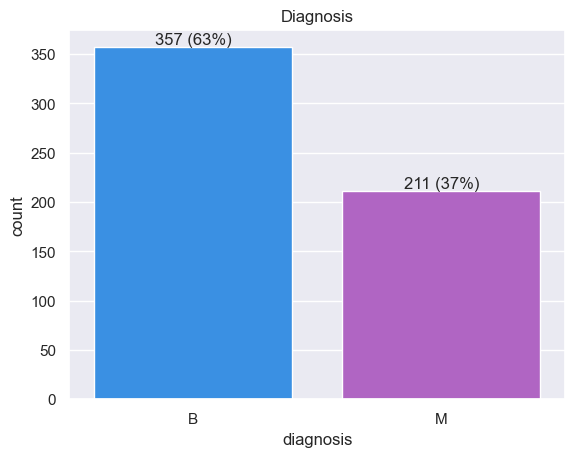

In [10]:
fig, ax = plt.subplots()
plt.title('Diagnosis')


ax = sns.countplot(x=data[dia],
                   order=data[dia].value_counts(ascending=False).index);
        
abs_values = data[dia].value_counts(ascending=False)
rel_values = data[dia].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls)
plt.show()

###  Descriptive Statistical Overview

In [11]:
# Description of features' means. 
data_means.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,0.062770
std,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,0.007035
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960
25%,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,0.057697
50%,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,0.061515
75%,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,0.066120
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440


### Relationship Between Attributes by Diagnosis

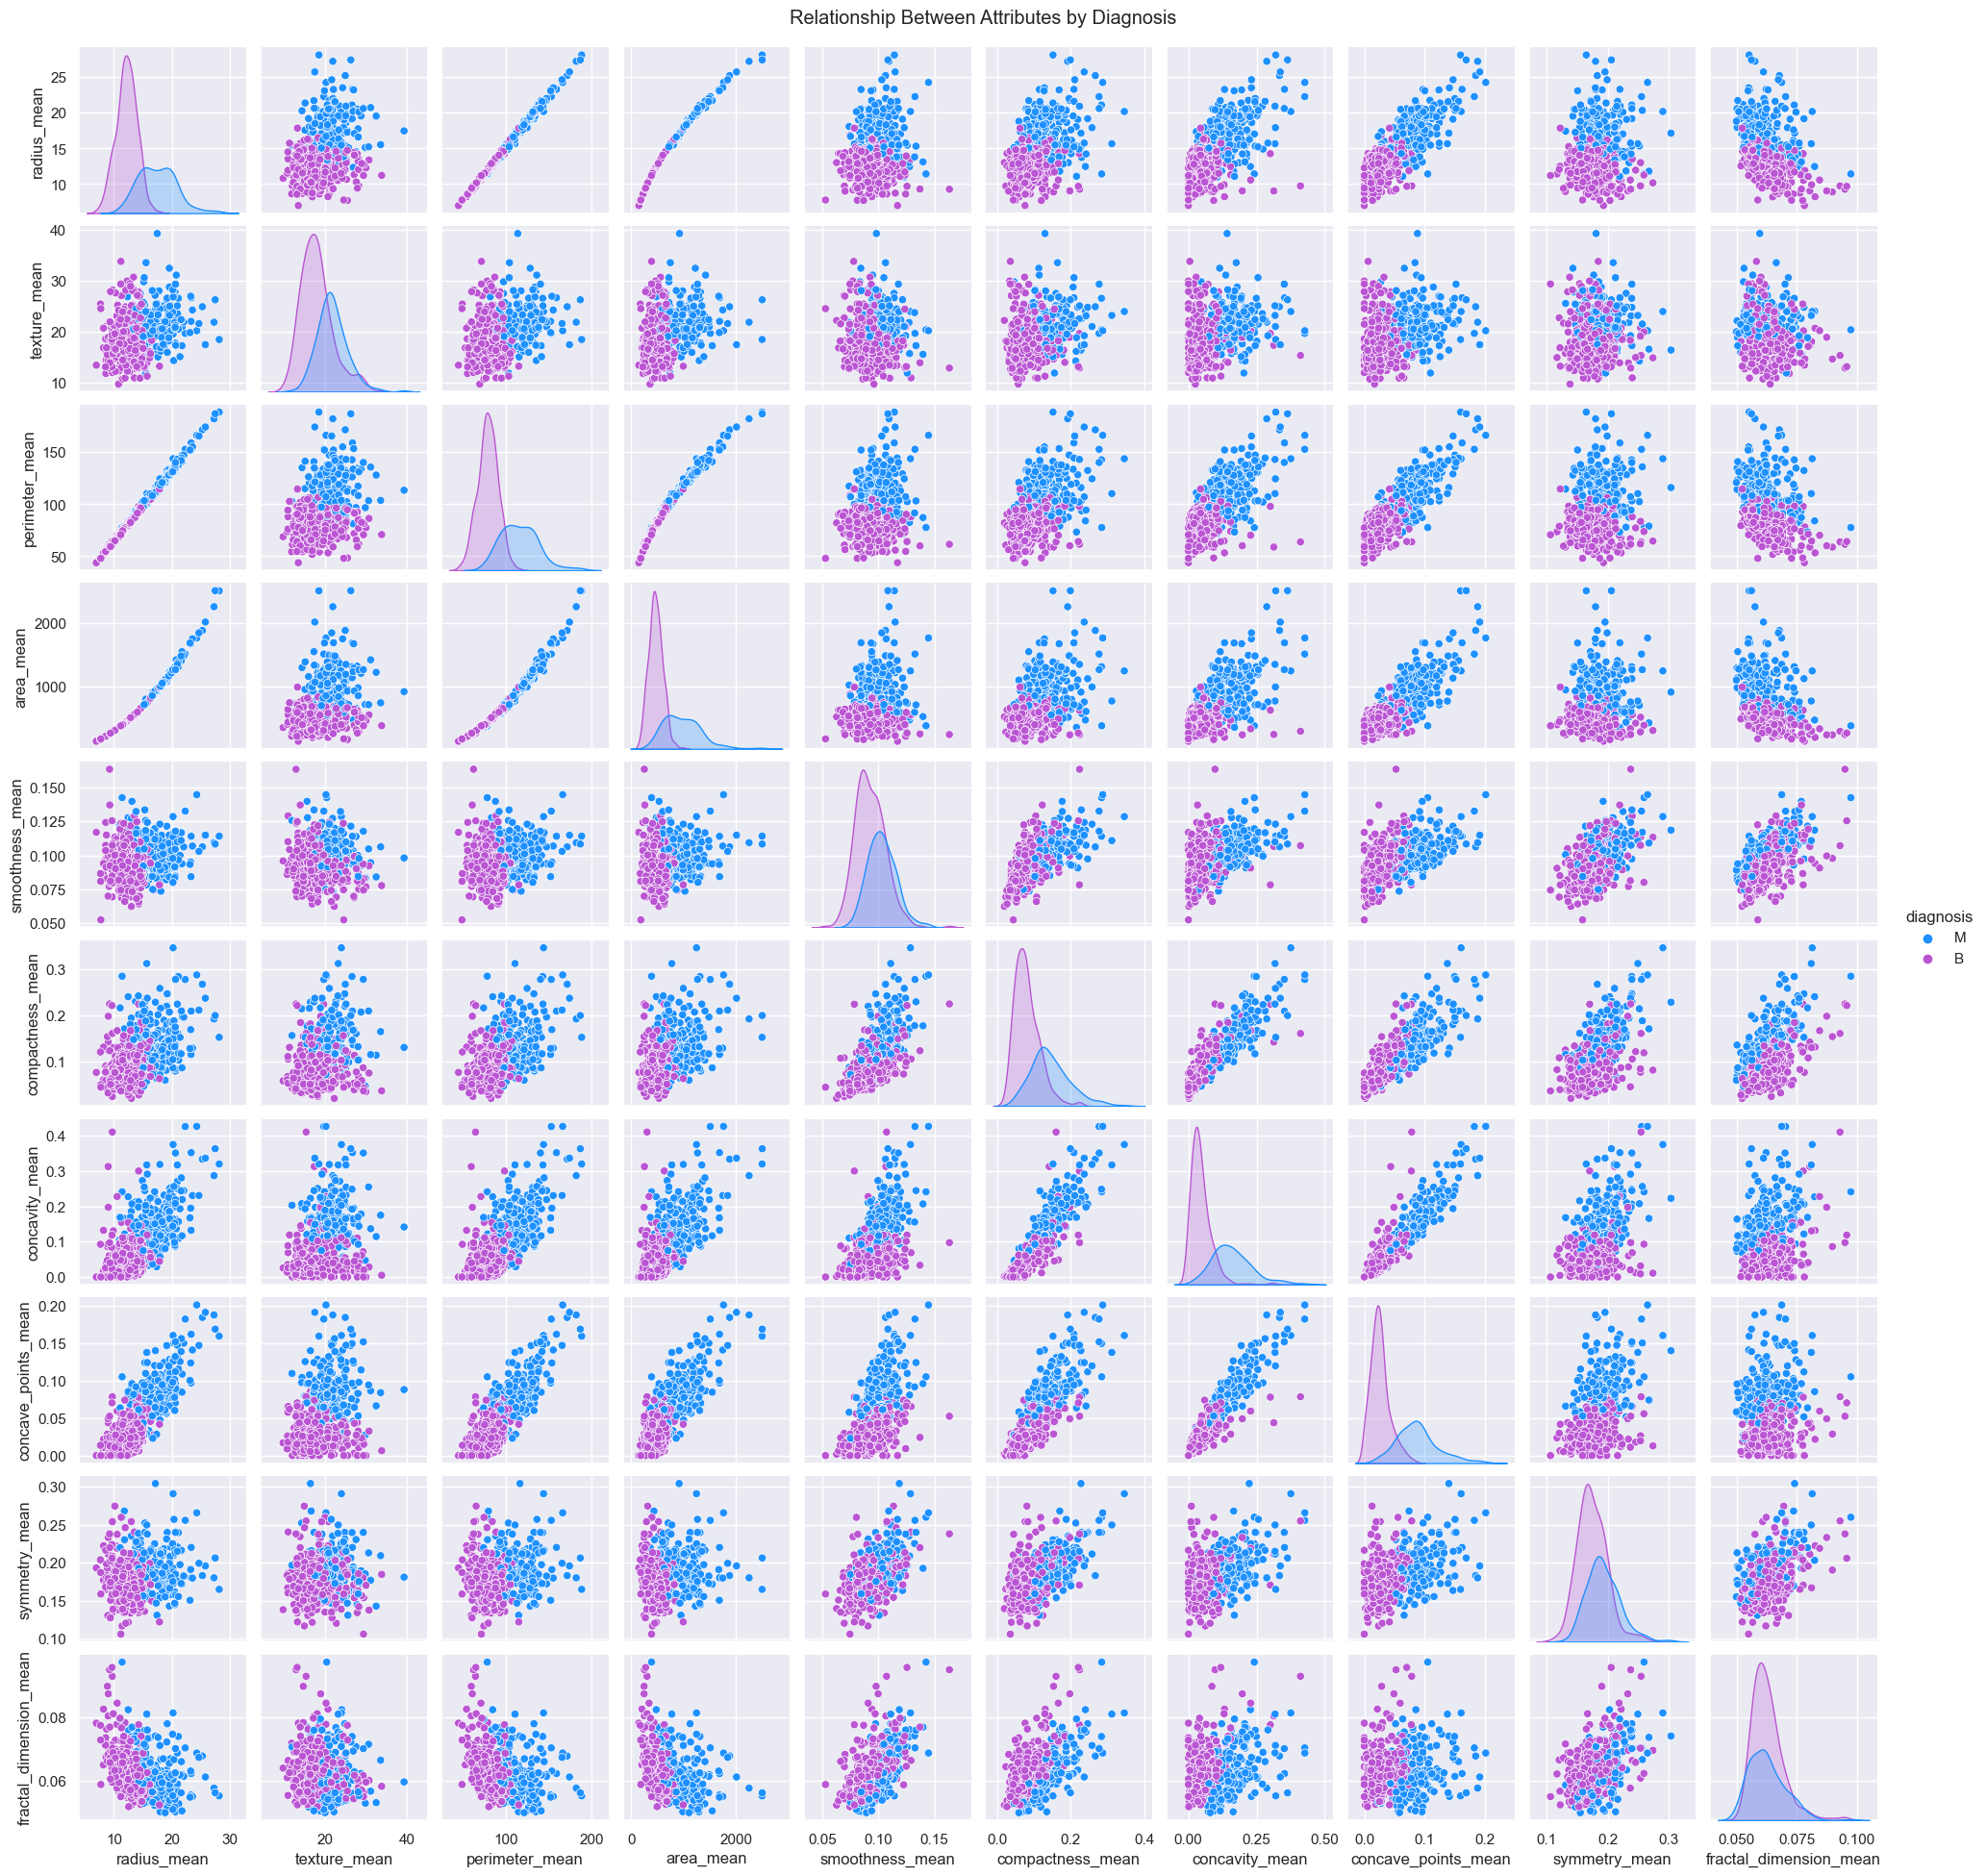

In [34]:
sns.pairplot(data=data_means, hue=dia, height=2, palette=pal)

plt.subplots_adjust(top=0.96)
plt.suptitle('Relationship Between Attributes by Diagnosis')
plt.show()

### Median Values

In [13]:
data_means.median(numeric_only=True)

radius_mean                13.355000
texture_mean               18.855000
perimeter_mean             86.210000
area_mean                 548.750000
smoothness_mean             0.095865
compactness_mean            0.092525
concavity_mean              0.061400
concave_points_mean         0.033455
symmetry_mean               0.179200
fractal_dimension_mean      0.061515
dtype: float64

### Mean by Diagnosis

In [14]:
data_means.groupby(dia).mean(numeric_only=True)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867
M,17.460332,21.658104,115.330142,978.269194,0.102825,0.144560,0.160114,0.087710,0.192677,0.062604


### Attributes Count

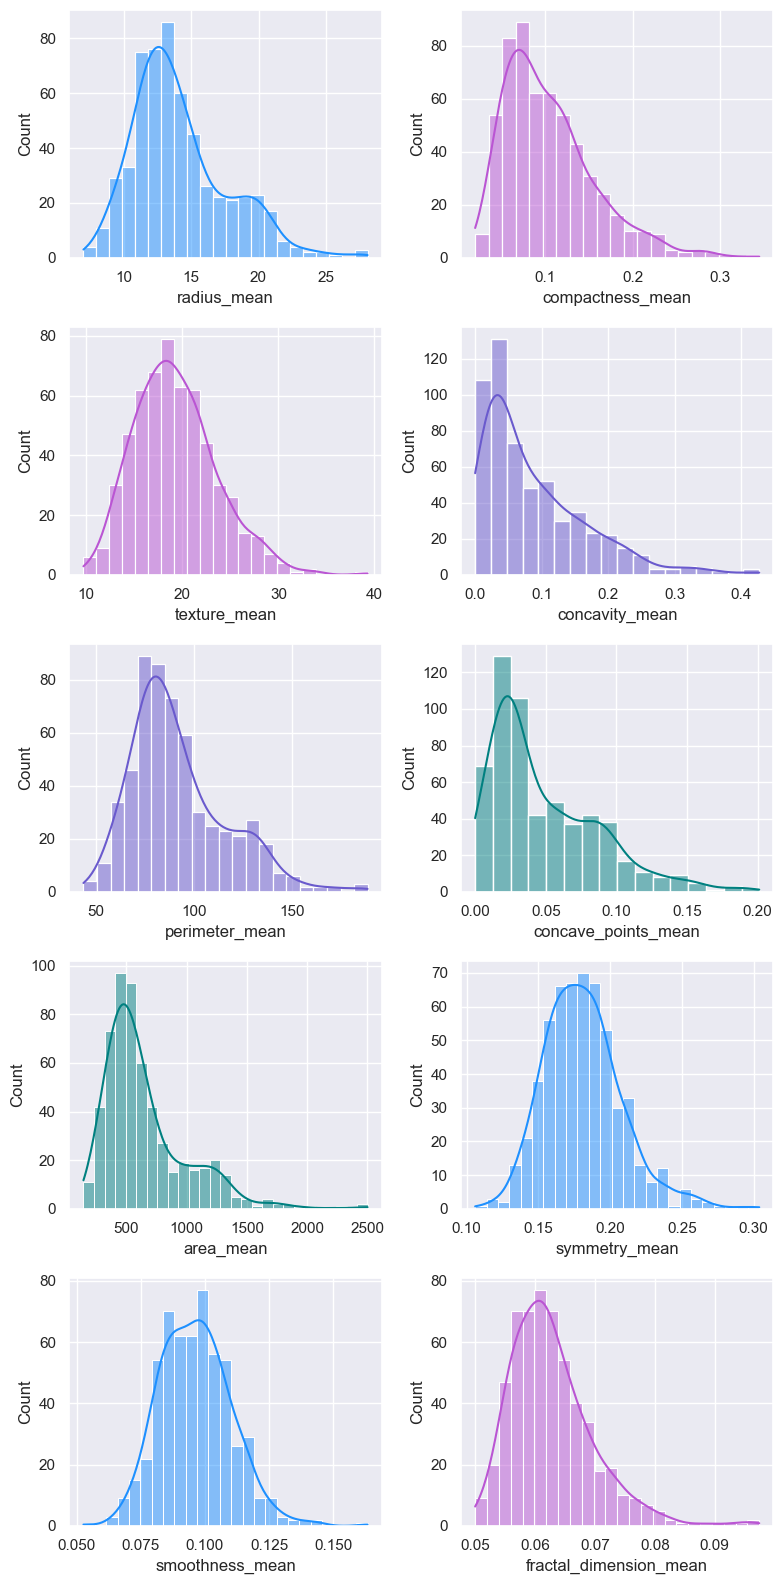

In [29]:
fig, axes = plt.subplots (5, 2, figsize=(8, 16))
sns.histplot(data=data_means, x=m1, ax=axes[0,0], kde=True, color="dodgerblue")
sns.histplot(data=data_means, x=m2, ax=axes[1,0], kde=True, color="mediumorchid")
sns.histplot(data=data_means, x=m3, ax=axes[2,0], kde=True, color="slateblue")
sns.histplot(data=data_means, x=m4, ax=axes[3,0], kde=True, color="teal")
sns.histplot(data=data_means, x=m5, ax=axes[4,0], kde=True, color="dodgerblue")
sns.histplot(data=data_means, x=m6, ax=axes[0,1], kde=True, color="mediumorchid")
sns.histplot(data=data_means, x=m7, ax=axes[1,1], kde=True, color="slateblue")
sns.histplot(data=data_means, x=m8, ax=axes[2,1], kde=True, color="teal")
sns.histplot(data=data_means, x=m9, ax=axes[3,1], kde=True, color="dodgerblue")
sns.histplot(data=data_means, x=m10, ax=axes[4,1], kde=True, color="mediumorchid")
fig.tight_layout()
plt.show()

### Attributes by Diagnosis + Outliers

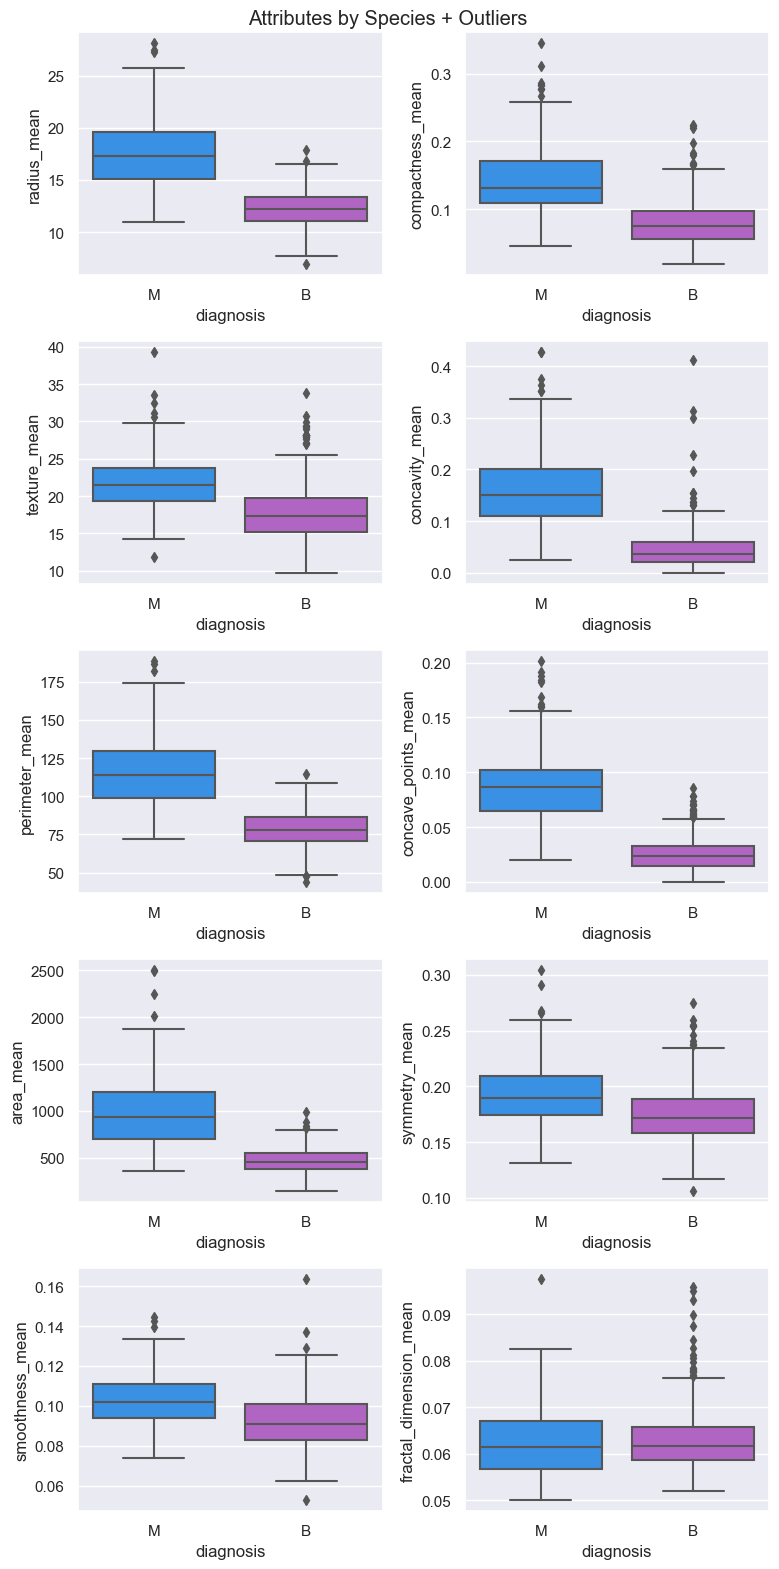

In [30]:
fig, axes = plt.subplots(5, 2, figsize=(8, 16)) 
sns.boxplot(x=dia, y=m1, data=data_means, ax=axes[0,0])
sns.boxplot(x=dia, y=m2, data=data_means, ax=axes[1,0])
sns.boxplot(x=dia, y=m3, data=data_means, ax=axes[2,0])
sns.boxplot(x=dia, y=m4, data=data_means, ax=axes[3,0])
sns.boxplot(x=dia, y=m5, data=data_means, ax=axes[4,0])
sns.boxplot(x=dia, y=m6, data=data_means, ax=axes[0,1])
sns.boxplot(x=dia, y=m7, data=data_means, ax=axes[1,1])
sns.boxplot(x=dia, y=m8, data=data_means, ax=axes[2,1])
sns.boxplot(x=dia, y=m9, data=data_means, ax=axes[3,1])
sns.boxplot(x=dia, y=m10, data=data_means, ax=axes[4,1])

plt.suptitle('Attributes by Species + Outliers')
fig.tight_layout()
plt.show()

### Correlation Between Atributes

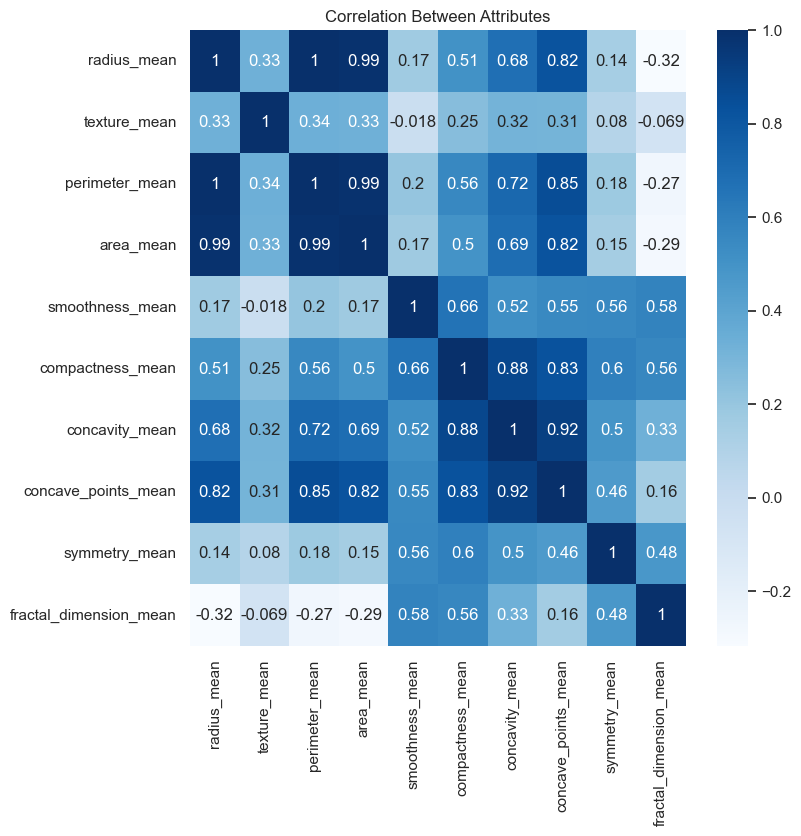

In [24]:
# Heatmap of correlations between attributes
plt.figure(figsize=(8,8))
sns.heatmap(data_means.corr(), annot=True, cmap='Blues')
plt.title('Correlation Between Attributes')
plt.show()

### Correlation Between Atributes by Diagnosis

In [ ]:
data_means.groupby(dia).corr()

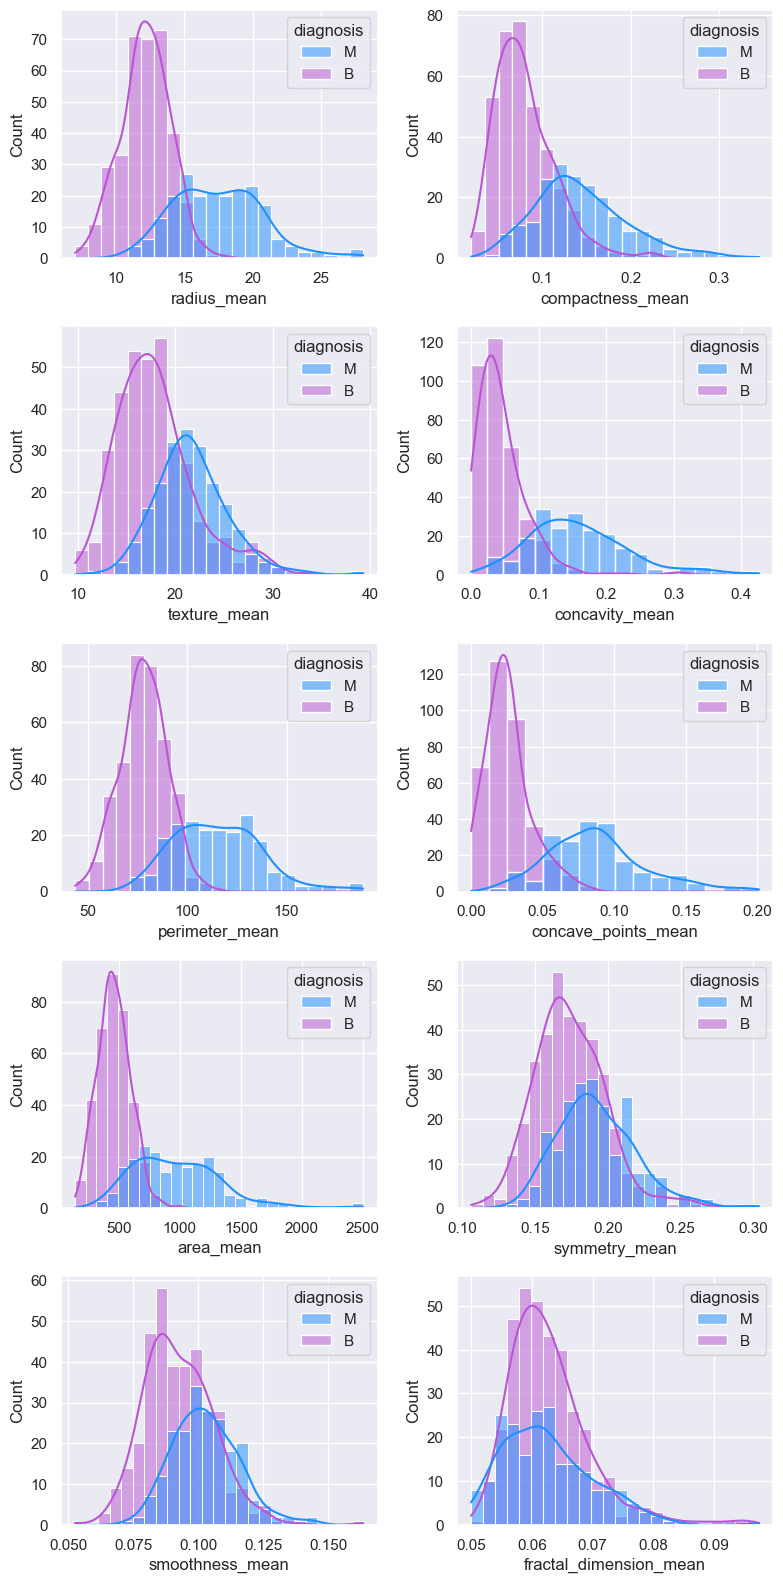

In [32]:
fig, axes = plt.subplots(5, 2, figsize=(8, 16))
sns.histplot(data=data_means, x=m1, ax=axes[0,0], hue=dia, kde=True)
sns.histplot(data=data_means, x=m2, ax=axes[1,0], hue=dia, kde=True)
sns.histplot(data=data_means, x=m3, ax=axes[2,0], hue=dia, kde=True)
sns.histplot(data=data_means, x=m4, ax=axes[3,0], hue=dia, kde=True)
sns.histplot(data=data_means, x=m5, ax=axes[4,0], hue=dia, kde=True)
sns.histplot(data=data_means, x=m6, ax=axes[0,1], hue=dia, kde=True)
sns.histplot(data=data_means, x=m7, ax=axes[1,1], hue=dia, kde=True)
sns.histplot(data=data_means, x=m8, ax=axes[2,1], hue=dia, kde=True)
sns.histplot(data=data_means, x=m9, ax=axes[3,1], hue=dia, kde=True)
sns.histplot(data=data_means, x=m10, ax=axes[4,1], hue=dia, kde=True)
fig.tight_layout()
plt.show()

## Classifiers
***

### Overview

In data science, a classifier is any deep learning algorithm that sorts unlabeled data into labeled classes, or categories of information. Those classes can be targets, labels or categories. (Asiri 2022, Dutta 2022).

Classifiers have a specific set of dynamic rules, which includes an interpretation procedure to handle vague or unknown values, all tailored to the type of inputs being examined. Most classifiers also employ probability estimates that allow end users to manipulate data classification with utility functions (DeepAI n.d.). 

The suitability of classification algorithms depends on the application and nature of the available data set. 

Common classification algorithms include: K-nearest neighbor, decision trees, naive bayes and artificial neural networks.

### Description

### Performance

## Machine Learning
***

- Using a range of machine learning algorithms, train a set of classifiers on the dataset (using SKLearn etc.) and present classification performance results. Detail your rationale for the parameter selections you made while training the classifiers
- Compare, contrast and critique your results with reference to the literature


Replacing Diagnosis strings 'M' and 'B' with ints.
data = data.replace('M',0)
data = data.replace('B',1)

## Data Synthesis
***

- Discuss and investigate how the dataset could be extended – using data synthesis of new tumour datapoints

## References
***

Asiri S, (2022). *An Introduction to Classification in Machine Learning.* Online at https://builtin.com/machine-learning/classification-machine-learning

DeepAI (n.d.). *What is a classifier in machine learning?* Online at https://deepai.org/machine-learning-glossary-and-terms/classifier

Dutta B, (2022)*6 Types of Classifiers in Machine Learning.* Online at https://www.analyticssteps.com/blogs/types-classifiers-machine-learning

Pandas (2022):
  - *pandas.DataFrame.replace* Online at https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html
  - *pandas.DataFrame.drop* Online at https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html
  
Seaborn (2022). *seaborn.histplot* Online at https://seaborn.pydata.org/generated/seaborn.histplot.html#seaborn.histplot

Shen Z, (2019). *Final Report: Breast Cancer Wisconsin.* Online at https://ziyuan-shen.github.io/files/breast_cancer_prediction_report.pdf
  
StackOverflow (2018). *How to add data Labels to seaborn countplot / factorplot?* Online at https://stackoverflow.com/questions/49044131/how-to-add-data-labels-to-seaborn-countplot-factorplot

UCI (1995). *Breast Cancer Wisconsin (Diagnostic) Data Set.* https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+(diagnostic)

Wolberg W, Mangasarian O, (1990). *Multisurface method of pattern separation for medical diagnosis
applied to breast cytology.* Online at https://www.ncbi.nlm.nih.gov/pmc/articles/PMC55130/pdf/pnas01048-0130.pdf